# 3-7-3 극평사투영법 (Polar stereographic) detail 수정

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
cenlon = -100
minlat=15
maxlat=90
textlat = minlat-15
textlon = cenlon

In [3]:
varname = "air"
plevel = 1000

In [4]:
file_clim = Dataset(varname+".mon.ltm.1981-2010.nc","r")
lon = np.squeeze(file_clim.variables['lon'][:])
lat = np.squeeze(file_clim.variables['lat'][:])
level = np.squeeze(file_clim.variables['level'][:])

#pindex2 =np.where(level==plevel)
pindex = np.where(level==plevel)[0]
print(pindex) #5

var_clim = np.squeeze(file_clim.variables[varname][0, pindex,:,:]) #1월 climatology 값
print(np.shape(var_clim)) 

file_var = Dataset(varname+".1981.nc","r")
var = np.squeeze(np.mean(file_var.variables[varname][:14,pindex,:,:], axis =0))
#1월 1일~14일 평균값
print(var.shape) #73, 144
print(np.shape(var))

var_anom=var - var_clim
#print(var_anom)
var_anom[lat<minlat,:] = np.nan
#print(var_anom)


[0]
(73, 144)
(73, 144)
(73, 144)


In [5]:
var_anom -= 273.25 

In [6]:
jet = cm.get_cmap('jet',100)
jet = jet(np.arange(100))
white = np.array([1.,1.,1.,1])
jet[45:56,:] = white
new_cmap = ListedColormap(jet)

contour_levels = np.arange(-10.,10.+1., 1.)

(144, 2)


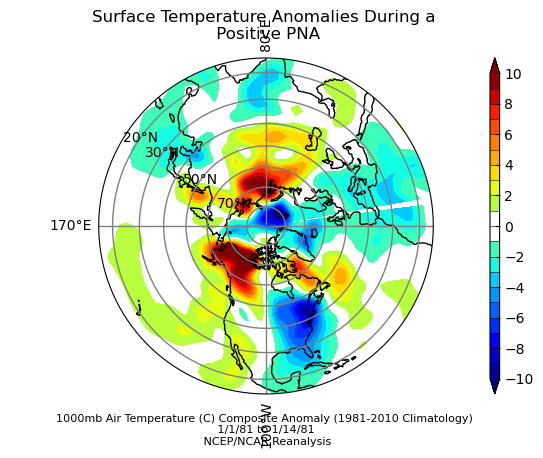

In [14]:
fig, ax = plt.subplots(1,1)

#1. x축 y축 테두리 꺼주기
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#2. x축 y축 label 꺼주기
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#3. 지도생성
ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=cenlon))
ax.set_extent([-180,180,minlat, maxlat], crs = ccrs.PlateCarree())

#4. 원형테두리 그리기
#왜인지 모르겠지만 이게 나중으로 가면 contourf 없이 테두리만 그려짐..
#이걸 먼저 그리면 잘 그려짐
theta = np.linspace(0, 2*np.pi, 144)
center = [0.5,0.5]
radius = 0.5
points = np.array([np.cos(theta), np.sin(theta)]).T
print(np.shape(points))
circle = mpath.Path(points*radius+center)
ax.set_boundary(circle, transform = ax.transAxes)

#5. 위도 및 경도선 그리기
#책대로 하면 4분선이 다 안그려지고 3개만 그려짐
#mticker.FixedLocator([]) 안에 들어가는 값을 바꿔주면 4분선이 잘 그려짐.
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, linewidth = 1, color = 'gray')
#gl.xlines = True
#gl.ylines = True
gl.xlocator = mticker.FixedLocator([cenlon, cenlon+90, cenlon+180, cenlon+270, cenlon+360])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
ax.coastlines(resolution = "110m")

image = ax.contourf(lon, lat, var_anom, levels = contour_levels, cmap = new_cmap, transform = ccrs.PlateCarree(),
                   extend = 'both')


#6. 컬러바 설정
caxes = fig.add_axes([0.85, 0.15, 0.015,0.7])
cbar = plt.colorbar(image, orientation = 'vertical', ticks = contour_levels[::2], drawedges = True, cax = caxes )
cbar.ax.tick_params(direction='in')
#cbar.ax.set_xticklabels([1,2,3])


#7. 타이틀과 설명
title = "Surface Temperature Anomalies During a \n Positive PNA"
explanation = "1000mb Air Temperature (C) Composite Anomaly (1981-2010 Climatology) \n 1/1/81 to 1/14/81 \n NCEP/NCAR Reanalysis"

plt.suptitle(title, fontsize = 12, y=0.95)
ax.text(textlon, textlat, explanation, fontsize=8, ha = 'center', transform = ccrs.Geodetic())
plt.subplots_adjust(top = 0.85, bottom = 0.15, left = 0.1, right = 0.9, wspace = 0.1, hspace = 0.1)


file_name = varname + "_anom_PNA.png"
plt.savefig(file_name)

(144, 2)


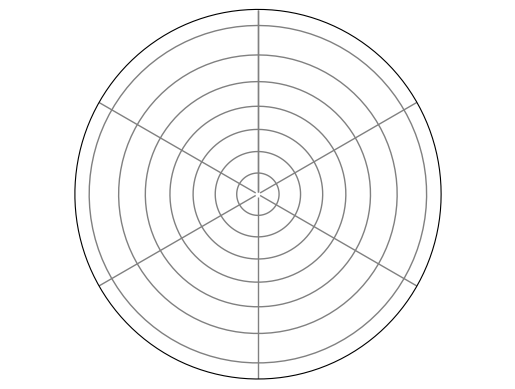

In [17]:
fig, ax = plt.subplots(1,1)

#1. x축 y축 테두리 꺼주기
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#2. x축 y축 label 꺼주기
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#3. 지도생성
ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=0))
ax.set_extent([-180,180,minlat, maxlat], crs = ccrs.PlateCarree())

#4. 원형테두리 그리기
#왜인지 모르겠지만 이게 나중으로 가면 contourf 없이 테두리만 그려짐..
#이걸 먼저 그리면 잘 그려짐
theta = np.linspace(0, 2*np.pi, 144)
center = [0.5,0.5]
radius = 0.5
points = np.array([np.cos(theta), np.sin(theta)]).T
print(np.shape(points))
circle = mpath.Path(points*radius+center)
ax.set_boundary(circle, transform = ax.transAxes)

#5. 위도 및 경도선 그리기
#책대로 하면 4분선이 다 안그려지고 3개만 그려짐
#mticker.FixedLocator([]) 안에 들어가는 값을 바꿔주면 4분선이 잘 그려짐.
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=False, linewidth = 1, color = 'gray')
#gl.xlines = True